In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Topological charge

    In this script I will analyze the topological charge in a Cairo Lattice if we increse linearly up from 0 mT to 50 mT with a rate of 0.0333 mT/s (1500 s). Then we are Analyzing the output data of Script-1.2.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-1.2"

In [3]:
slope = 50/1500
slope

0.03333333333333333

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_50mT-1500s_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_50mT-1500s_l10_exp4.dat
ACI_CairoLattice_50mT-1500s_l10_exp11.dat
ACI_CairoLattice_50mT-1500s_l10_exp13.dat
ACI_CairoLattice_50mT-1500s_l10_exp9.dat
ACI_CairoLattice_50mT-1500s_l10_exp44.dat
ACI_CairoLattice_50mT-1500s_l10_exp21.dat
ACI_CairoLattice_50mT-1500s_l10_exp36.dat
ACI_CairoLattice_50mT-1500s_l10_exp28.dat
ACI_CairoLattice_50mT-1500s_l10_exp41.dat
ACI_CairoLattice_50mT-1500s_l10_exp17.dat
ACI_CairoLattice_50mT-1500s_l10_exp37.dat
ACI_CairoLattice_50mT-1500s_l10_exp7.dat
ACI_CairoLattice_50mT-1500s_l10_exp12.dat
ACI_CairoLattice_50mT-1500s_l10_exp20.dat
ACI_CairoLattice_50mT-1500s_l10_exp39.dat
ACI_CairoLattice_50mT-1500s_l10_exp15.dat
ACI_CairoLattice_50mT-1500s_l10_exp5.dat
ACI_CairoLattice_50mT-1500s_l10_exp40.dat
ACI_CairoLattice_50mT-1500s_l10_exp24.dat
ACI_CairoLattice_50mT-1500s_l10_exp16.dat
ACI_CairoLattice_50mT-1500s_l10_exp47.dat
ACI_CairoLattice_50mT-1500s_l10_exp35.dat
ACI_CairoLattice_50mT-1500s_l10_exp46.dat
ACI_CairoLattice_50mT-1500s_l10_exp0.d

In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      25    301.104439 -301.304550             4       4  0.000000   
           28    704.625685 -417.196014             3      -1 -1.000000   
           47    440.070723 -115.898809             4       0  2.732051   
           48    347.420541 -115.904316             4      -2 -1.732051   
           49    324.265015 -102.505692             3       1 -1.732051   
...                     ...         ...           ...     ...       ...   
49  150000 1199  426.684724 -602.604004             3       1 -2.000000   
           1200  416.911987 -566.024860             3      -1  1.732051   
           1202  175.521088  -92.704002             3       1  2.000000   
           1203  195.066852  -92.704002             3      -1  2.000000   
           1205  787.500000 -731.857662             3       1  0.000000   

                       dy  
Exp frame  id              
0   0      25    0.000000  
           28    1.732051  
           47    0.732050  
           48    1.000000  
           49   -1.000000  
...                   ...  
49  150000 1199  0.000000  
           1200  1.000000  
           1202  0.000000  
           1203  0.000000  
           1205 -2.000000  

[5103800 rows x 6 columns]

In [8]:
Cairo_exp['field'] = (Cairo_exp.index.get_level_values('frame'))/100*slope

## 1. Total topological charge

In [9]:
Topo_q = Cairo_exp.groupby('field').sum()/Cairo_exp.groupby('field').count()

In [10]:
Topo_q

,x,y,coordination,charge,dx,dy
field,,,,,,
0.000000,447.795505,-424.89281,3.33284,0.001893,0.027913,0.006069
0.333333,447.795505,-424.89281,3.33284,0.001775,0.024913,0.001260
0.666667,447.795505,-424.89281,3.33284,0.003195,0.019944,-0.002463
1.000000,447.795505,-424.89281,3.33284,0.000888,0.012498,0.002259
1.333333,447.795505,-424.89281,3.33284,0.001598,0.024306,0.011260
...,...,...,...,...,...,...
48.666667,447.795505,-424.89281,3.33284,-0.007574,-0.009964,0.007550
49.000000,447.795505,-424.89281,3.33284,-0.009231,-0.002231,0.012206
49.333333,447.795505,-424.89281,3.33284,-0.008402,-0.008689,-0.007428


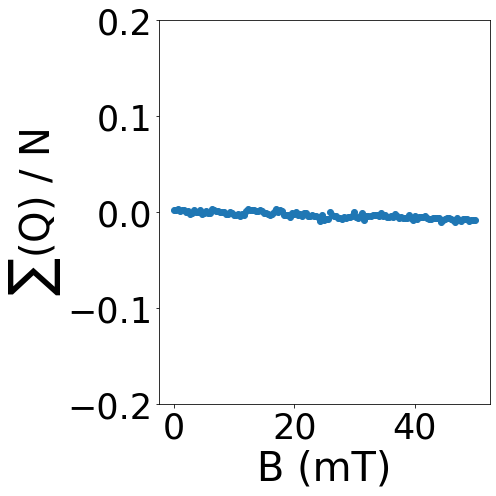

In [11]:
fig, ax1 = plt.subplots(figsize=(7,7))

plt.plot(Topo_q.index.get_level_values('field'), Topo_q.charge, 'o')

ax1.tick_params(axis='y', labelsize=35)
ax1.tick_params(axis='x', labelsize=35)  

ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('$\sum$(Q) / N', size = 40)
ax1.set_ylim(-0.2,0.2)

plt.tight_layout()

### 2. Total topological charge of each sublattice

In [15]:
Cairo_exp.groupby(['field','coordination']).sum()


x             y  charge          dx  \
field     coordination                                                   
0.000000  3             1.018467e+07 -9.407407e+06     150  531.290962   
          4             4.950815e+06 -4.953970e+06     -86  412.180695   
0.333333  3             1.018467e+07 -9.407407e+06     162  430.558912   
          4             4.950815e+06 -4.953970e+06    -102  411.448644   
0.666667  3             1.018467e+07 -9.407407e+06     210  322.721739   
...                              ...           ...     ...         ...   
49.333333 4             4.950815e+06 -4.953970e+06    6124 -347.611472   
49.666667 3             1.018467e+07 -9.407407e+06   -6352 -283.138478   
          4             4.950815e+06 -4.953970e+06    6056 -339.453821   
50.000000 3             1.018467e+07 -9.407407e+06   -6684  151.176906   
          4             4.950815e+06 -4.953970e+06    6410  -67.549973   

                                dy  
field     coordination              
0.000000  3              47.956350  
          4             157.171755  
0.333333  3            -121.311597  
          4             163.903807  
0.666667  3            -263.919294  
...                            ...  
49.333333 4            -244.252432  
49.666667 3             121.264271  
          4            -190.984462  
50.000000 3             486.497471  
          4             131.353847  

[302 rows x 5 columns]

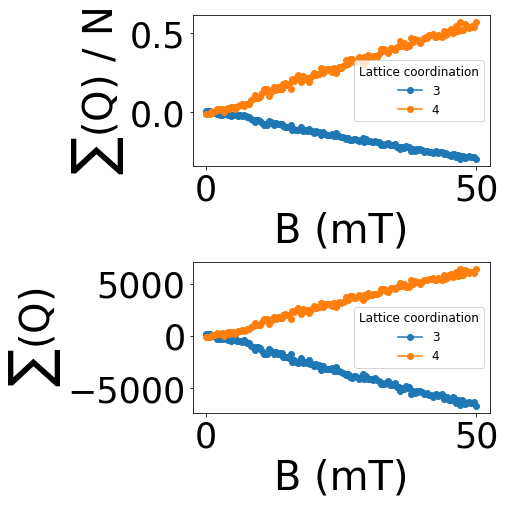

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(7,7))

Sep_charge_tot = Cairo_exp.groupby(['field','coordination']).sum()

Sep_charge = Cairo_exp.groupby(['field','coordination']).sum()/Cairo_exp.groupby(['field','coordination']).count()

for typ_m, mtype in Sep_charge.groupby('coordination'):
    
    ax[0].plot(mtype.index.get_level_values("field"), mtype["charge"],'-o', label = typ_m)
    
for typ_m, mtype in Sep_charge_tot.groupby('coordination'):
    
    ax[1].plot(mtype.index.get_level_values("field"), mtype["charge"],'-o', label = typ_m)

    
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=35) 
ax[0].legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax[0].set_xlabel('B (mT)', size = 40)
ax[0].set_ylabel('$\sum$(Q) / N', size = 40)

ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=35)  

ax[1].legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)
ax[1].set_xlabel('B (mT)', size = 40)
ax[1].set_ylabel('$\sum$(Q)', size = 40)


plt.tight_layout()